The goal of this notebook is to format the data in a compact notebook and perform statistical analysis

In [1]:
import os 
import copy
import scipy
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from importlib import reload
import fxsdata
from fxsdata import fxs_mouse

In [2]:
%matplotlib notebook
#%matplotlib inline

In [3]:
num_queries = 4 
query_names = ['Synapsin, PSD95', 'Synapsin, VGluT1, PSD95', 'Synapsin, VGluT2, PSD95', 'Synapsin, VGluT1, VGluT2, PSD95']
region_names = ['F000', 'F001', 'F002', 'F003']
layer_names = ['Layer1', 'Layer2', 'Layer3', 'Layer4']
z_spans = [1, 2, 3]
style_name = 'seaborn-whitegrid'
xticklabels = ['2ss v 3ss', '4ss v 6ss', '5ss v 7ss', '2ss (second) v 1ss']
plot_titles = query_names
row_labels = ['Q0', 'Q1', 'Q2', 'Q3']

Load data into fxs_mouse objects 

In [4]:
list_of_mice = []
mice_dict = {} 

name = '2ss'
fn = '/Users/anish/Documents/yi_mice/excel/2ss_fragX_excitatory_astro.xlsx'
layer_order = 'backward'
mouse_type = 'WT'
astro_mouse_2ss = fxs_mouse(name)
astro_mouse_2ss.create_mouse_fn(name, fn, mouse_type, layer_order, num_queries, query_names, region_names, layer_names, z_spans)
list_of_mice.append(astro_mouse_2ss)
mice_dict[name] = astro_mouse_2ss

name = '3ss'
fn = '/Users/anish/Documents/yi_mice/excel/3ss_fragX_excitatory_astro.xlsx'
layer_order = 'backward'
mouse_type = 'KO'
astro_mouse_3ss = fxs_mouse(name)
astro_mouse_3ss.create_mouse_fn(name, fn, mouse_type, layer_order, num_queries, query_names, region_names, layer_names, z_spans)
list_of_mice.append(astro_mouse_3ss)
mice_dict[name] = astro_mouse_3ss


name = '4ss'
fn = '/Users/anish/Documents/yi_mice/excel/4ss_fragX_excitatory_astro.xlsx'
layer_order = 'backward'
mouse_type = 'WT'
astro_mouse_4ss = fxs_mouse(name)
astro_mouse_4ss.create_mouse_fn(name, fn, mouse_type, layer_order, num_queries, query_names, region_names, layer_names, z_spans)
list_of_mice.append(astro_mouse_4ss)
mice_dict[name] = astro_mouse_4ss


name = '5ss'
fn = '/Users/anish/Documents/yi_mice/excel/5ss_fragX_excitatory_astro.xlsx'
layer_order = 'backward'
mouse_type = 'WT'
astro_mouse_5ss = fxs_mouse(name)
astro_mouse_5ss.create_mouse_fn(name, fn, mouse_type, layer_order, num_queries, query_names, region_names, layer_names, z_spans)
list_of_mice.append(astro_mouse_5ss)
mice_dict[name] = astro_mouse_5ss


name = '6ss'
fn = '/Users/anish/Documents/yi_mice/excel/6ss_fragX_excitatory_astro.xlsx'
layer_order = 'forward'
mouse_type = 'KO'
astro_mouse_6ss = fxs_mouse(name)
astro_mouse_6ss.create_mouse_fn(name, fn, mouse_type, layer_order, num_queries, query_names, region_names, layer_names, z_spans)
list_of_mice.append(astro_mouse_6ss)
mice_dict[name] = astro_mouse_6ss


name = '7ss'
fn = '/Users/anish/Documents/yi_mice/excel/7ss_fragX_excitatory_astro.xlsx'
layer_order = 'forward'
mouse_type = 'KO'
astro_mouse_7ss = fxs_mouse(name)
astro_mouse_7ss.create_mouse_fn(name, fn, mouse_type, layer_order, num_queries, query_names, region_names, layer_names, z_spans)
list_of_mice.append(astro_mouse_7ss)
mice_dict[name] = astro_mouse_7ss


name = '1ss'
fn = '/Users/anish/Documents/yi_mice/excel/1ss_fragX_excitatory_astro.xlsx'
layer_order = 'forward'
mouse_type = 'KO'
astro_mouse_1ss = fxs_mouse(name)
astro_mouse_1ss.create_mouse_fn(name, fn, mouse_type, layer_order, num_queries, query_names, region_names, layer_names, z_spans)
list_of_mice.append(astro_mouse_1ss)
mice_dict[name] = astro_mouse_1ss


name = '22ss'
fn = '/Users/anish/Documents/yi_mice/excel/22ss_fragX_excitatory_astro.xlsx'
layer_order = 'backward'
mouse_type = 'WT'
astro_mouse_22ss = fxs_mouse(name)
astro_mouse_22ss.create_mouse_fn(name, fn, mouse_type, layer_order, num_queries, query_names, region_names, layer_names, z_spans)
list_of_mice.append(astro_mouse_22ss)
mice_dict[name] = astro_mouse_22ss



36 48
24 36
12 24
0 12
36 48
24 36
12 24
0 12
36 48
24 36
12 24
0 12
36 48
24 36
12 24
0 12
0 12
12 24
24 36
36 48
0 12
12 24
24 36
36 48
0 12
12 24
24 36
36 48
36 48
24 36
12 24
0 12


In [5]:
fn = '/Users/anish/Documents/yi_mice/excel/vglut2/2ss_gs_vglut2_queries.xlsx'
astro_mouse_2ss = fxsdata.update_vglut2_queries(astro_mouse_2ss, fn, layer_order = 'backward')

fn = '/Users/anish/Documents/yi_mice/excel/vglut2/3ss_gs_vglut2_queries.xlsx'
astro_mouse_3ss = fxsdata.update_vglut2_queries(astro_mouse_3ss, fn, layer_order = 'backward')

fn = '/Users/anish/Documents/yi_mice/excel/vglut2/4ss_gs_vglut2_queries.xlsx'
astro_mouse_4ss = fxsdata.update_vglut2_queries(astro_mouse_4ss, fn, layer_order = 'backward')

fn = '/Users/anish/Documents/yi_mice/excel/vglut2/6ss_gs_vglut2_queries.xlsx'
astro_mouse_6ss = fxsdata.update_vglut2_queries(astro_mouse_6ss, fn, layer_order = 'forward')

fn = '/Users/anish/Documents/yi_mice/excel/vglut2/5ss_gs_vglut2_queries.xlsx'
astro_mouse_5ss = fxsdata.update_vglut2_queries(astro_mouse_5ss, fn, layer_order = 'backward')

fn = '/Users/anish/Documents/yi_mice/excel/vglut2/7ss_gs_vglut2_queries.xlsx'
astro_mouse_7ss = fxsdata.update_vglut2_queries(astro_mouse_7ss, fn, layer_order = 'forward')

fn = '/Users/anish/Documents/yi_mice/excel/vglut2/22ss_gs_vglut2_queries.xlsx'
astro_mouse_22ss = fxsdata.update_vglut2_queries(astro_mouse_22ss, fn, layer_order = 'backward')

fn = '/Users/anish/Documents/yi_mice/excel/vglut2/1ss_gs_vglut2_queries.xlsx'
astro_mouse_1ss = fxsdata.update_vglut2_queries(astro_mouse_1ss, fn, layer_order = 'forward')

## Load inhibitory synapse data

In [6]:
num_queries_in_fn = 1
qlist = ['q4']

fn = '/Users/anish/Documents/yi_mice/excel/2ss_inhibitory_astro.xlsx'
layer_order = 'backward'
astro_mouse_2ss = fxsdata.add_query_to_mouse(astro_mouse_2ss, fn, num_queries_in_fn, qlist, layer_order)

fn = '/Users/anish/Documents/yi_mice/excel/3ss_inhibitory_astro.xlsx'
layer_order = 'backward'
astro_mouse_3ss = fxsdata.add_query_to_mouse(astro_mouse_3ss, fn, num_queries_in_fn, qlist, layer_order)

fn = '/Users/anish/Documents/yi_mice/excel/4ss_inhibitory_astro.xlsx'
layer_order = 'backward'
astro_mouse_4ss = fxsdata.add_query_to_mouse(astro_mouse_4ss, fn, num_queries_in_fn, qlist, layer_order)

fn = '/Users/anish/Documents/yi_mice/excel/5ss_inhibitory_astro.xlsx'
layer_order = 'backward'
astro_mouse_5ss = fxsdata.add_query_to_mouse(astro_mouse_5ss, fn, num_queries_in_fn, qlist, layer_order)

fn = '/Users/anish/Documents/yi_mice/excel/6ss_inhibitory_astro.xlsx'
layer_order = 'forward'
astro_mouse_6ss = fxsdata.add_query_to_mouse(astro_mouse_6ss, fn, num_queries_in_fn, qlist, layer_order)

fn = '/Users/anish/Documents/yi_mice/excel/7ss_inhibitory_astro.xlsx'
layer_order = 'forward'
astro_mouse_7ss = fxsdata.add_query_to_mouse(astro_mouse_7ss, fn, num_queries_in_fn, qlist, layer_order)

fn = '/Users/anish/Documents/yi_mice/excel/1ss_inhibitory_astro.xlsx'
layer_order = 'forward'
astro_mouse_1ss = fxsdata.add_query_to_mouse(astro_mouse_1ss, fn, num_queries_in_fn, qlist, layer_order)

fn = '/Users/anish/Documents/yi_mice/excel/22ss_inhibitory_astro.xlsx'
layer_order = 'backward'
astro_mouse_22ss = fxsdata.add_query_to_mouse(astro_mouse_22ss, fn, num_queries_in_fn, qlist, layer_order)

In [7]:


# Add small synapses (1slice-2slice to the calculations)
astro_mouse_2ss = fxsdata.compute_small_synapses(astro_mouse_2ss)
astro_mouse_3ss = fxsdata.compute_small_synapses(astro_mouse_3ss)
astro_mouse_4ss = fxsdata.compute_small_synapses(astro_mouse_4ss)
astro_mouse_5ss = fxsdata.compute_small_synapses(astro_mouse_5ss)
astro_mouse_6ss = fxsdata.compute_small_synapses(astro_mouse_6ss)
astro_mouse_7ss = fxsdata.compute_small_synapses(astro_mouse_7ss)
astro_mouse_1ss = fxsdata.compute_small_synapses(astro_mouse_1ss)
astro_mouse_22ss = fxsdata.compute_small_synapses(astro_mouse_22ss)


# Add medium synapses (1slice-2slice to the calculations)
astro_mouse_2ss = fxsdata.compute_medium_synapses(astro_mouse_2ss)
astro_mouse_3ss = fxsdata.compute_medium_synapses(astro_mouse_3ss)
astro_mouse_4ss = fxsdata.compute_medium_synapses(astro_mouse_4ss)
astro_mouse_5ss = fxsdata.compute_medium_synapses(astro_mouse_5ss)
astro_mouse_6ss = fxsdata.compute_medium_synapses(astro_mouse_6ss)
astro_mouse_7ss = fxsdata.compute_medium_synapses(astro_mouse_7ss)
astro_mouse_1ss = fxsdata.compute_medium_synapses(astro_mouse_1ss)
astro_mouse_22ss = fxsdata.compute_medium_synapses(astro_mouse_22ss)




In [8]:
row_labels = ['Q0', 'Q1', 'Q2', 'Q3', 'Q4']


In [9]:
# Combine multiple mice into an average mouse for each type

In [10]:
astro_wt_mouse_list = [astro_mouse_2ss, astro_mouse_4ss, astro_mouse_5ss, astro_mouse_22ss]
mouse_name = 'wildtype'
astro_wt_mouse = fxsdata.average_mice(astro_wt_mouse_list, mouse_name, row_labels)

In [11]:
astro_ko_mouse_list = [astro_mouse_3ss, astro_mouse_6ss, astro_mouse_7ss, astro_mouse_1ss]
mouse_name = 'knockout'
astro_ko_mouse = fxsdata.average_mice(astro_ko_mouse_list, mouse_name, row_labels)

In [12]:
query_list = ['q0', 'q1', 'q2', 'q3', 'q4']

In [13]:
# Generate average df and p values

In [14]:
for slicespan in range(0, 4): 
    mouse_name = 'average wildtype, z=' + str(slicespan)
    wt_df = fxsdata.average_mouse_to_df(astro_wt_mouse, row_labels, slicespan, mouse_name)
    
    mouse_name = 'average knockout, z=' + str(slicespan)
    ko_df = fxsdata.average_mouse_to_df(astro_ko_mouse, row_labels, slicespan, mouse_name)

    df_name = 'p-values, z=' + str(slicespan)
    pval_df = fxsdata.create_pval_df(query_list, slicespan, astro_ko_mouse_list, astro_wt_mouse_list, df_name, 'unpaired')
    


In [15]:
ko_df

,3-F000,3-F001,3-F002,3-F003
Q0,0.036736,0.064403,0.072425,0.047667
Q1,0.016497,0.034868,0.038661,0.019672
Q2,0.000195,0.000551,0.001931,0.004152
Q3,0.000019,0.000144,0.000527,0.001232
Q4,0.000152,0.000222,0.000519,0.000680


## AVERAGE LAYERS


In [16]:
query_list = ['Q0', 'Q1', 'Q2', 'Q3', 'Q4']

# Average Layers

# Add small synapses (1slice-2slice to the calculations)
avg_layer_mouse_2ss = fxsdata.average_mouse_layers(astro_mouse_2ss, query_list)
avg_layer_mouse_3ss = fxsdata.average_mouse_layers(astro_mouse_3ss, query_list)
avg_layer_mouse_4ss = fxsdata.average_mouse_layers(astro_mouse_4ss, query_list)
avg_layer_mouse_5ss = fxsdata.average_mouse_layers(astro_mouse_5ss, query_list)
avg_layer_mouse_6ss = fxsdata.average_mouse_layers(astro_mouse_6ss, query_list)
avg_layer_mouse_7ss = fxsdata.average_mouse_layers(astro_mouse_7ss, query_list)
avg_layer_mouse_1ss = fxsdata.average_mouse_layers(astro_mouse_1ss, query_list)
avg_layer_mouse_22ss = fxsdata.average_mouse_layers(astro_mouse_22ss, query_list)

query_list

avg_layer_wt_mouse_list = [avg_layer_mouse_2ss, avg_layer_mouse_4ss, avg_layer_mouse_5ss, avg_layer_mouse_22ss]
mouse_name = 'wildtype'
avg_layer_wt_mouse = fxsdata.average_layer_mice(avg_layer_wt_mouse_list, mouse_name, row_labels)

avg_layer_ko_mouse_list = [avg_layer_mouse_3ss, avg_layer_mouse_6ss, avg_layer_mouse_7ss, avg_layer_mouse_1ss]
mouse_name = 'knockout'
avg_layer_ko_mouse = fxsdata.average_layer_mice(avg_layer_ko_mouse_list, mouse_name, row_labels)

layer_key = 'average'

pairkey = 'unpaired'
layer_avg_pval_dict = fxsdata.create_layer_avg_pval_dict(avg_layer_ko_mouse_list, avg_layer_wt_mouse_list, query_list, pairkey)



for slicespan in range(0, 4): 
    mouse_name = 'average layer wildtype, z=' + str(slicespan)
    avg_layer_wt_df = fxsdata.average_layer_mice_to_df(avg_layer_wt_mouse, row_labels, slicespan, mouse_name)
    
    mouse_name = 'average layer knockout, z=' + str(slicespan)
    avg_layer_ko_df = fxsdata.average_layer_mice_to_df(avg_layer_ko_mouse, row_labels, slicespan, mouse_name)

    df_name = 'p-values, z=' + str(slicespan)
    avg_layer_pval_df = fxsdata.create_layer_avg_pval_df(query_list, layer_key, slicespan, avg_layer_ko_mouse_list, avg_layer_wt_mouse_list, df_name, 'unpaired')
    


## Figures

In [17]:
layer_key_list = ['average', 'average_L1', 'average_L23', 'average_L4']
layer_fn_list = ['all', 'L1', 'L23', 'L4']
layer_title_list = ['All Layers', 'Layer 1', 'Layer 2/3', 'Layer 4']

size_fn_list = ['z0', 'z1', 'z2', 'z3']
size_key_list = ['0', '1', '2', '3']
size_title_list = ['Small', 'All', 'Medium', 'Large']

In [18]:
query_keys=row_labels

In [19]:
xlabels = ['Glut.', 'Glut.\n VGluT1','Glut.\n VGluT2', 'Glut. \n VGluT1/VGluT2', 'Inhibitory']

In [20]:
query_keys

['Q0', 'Q1', 'Q2', 'Q3', 'Q4']

<IPython.core.display.Javascript object>


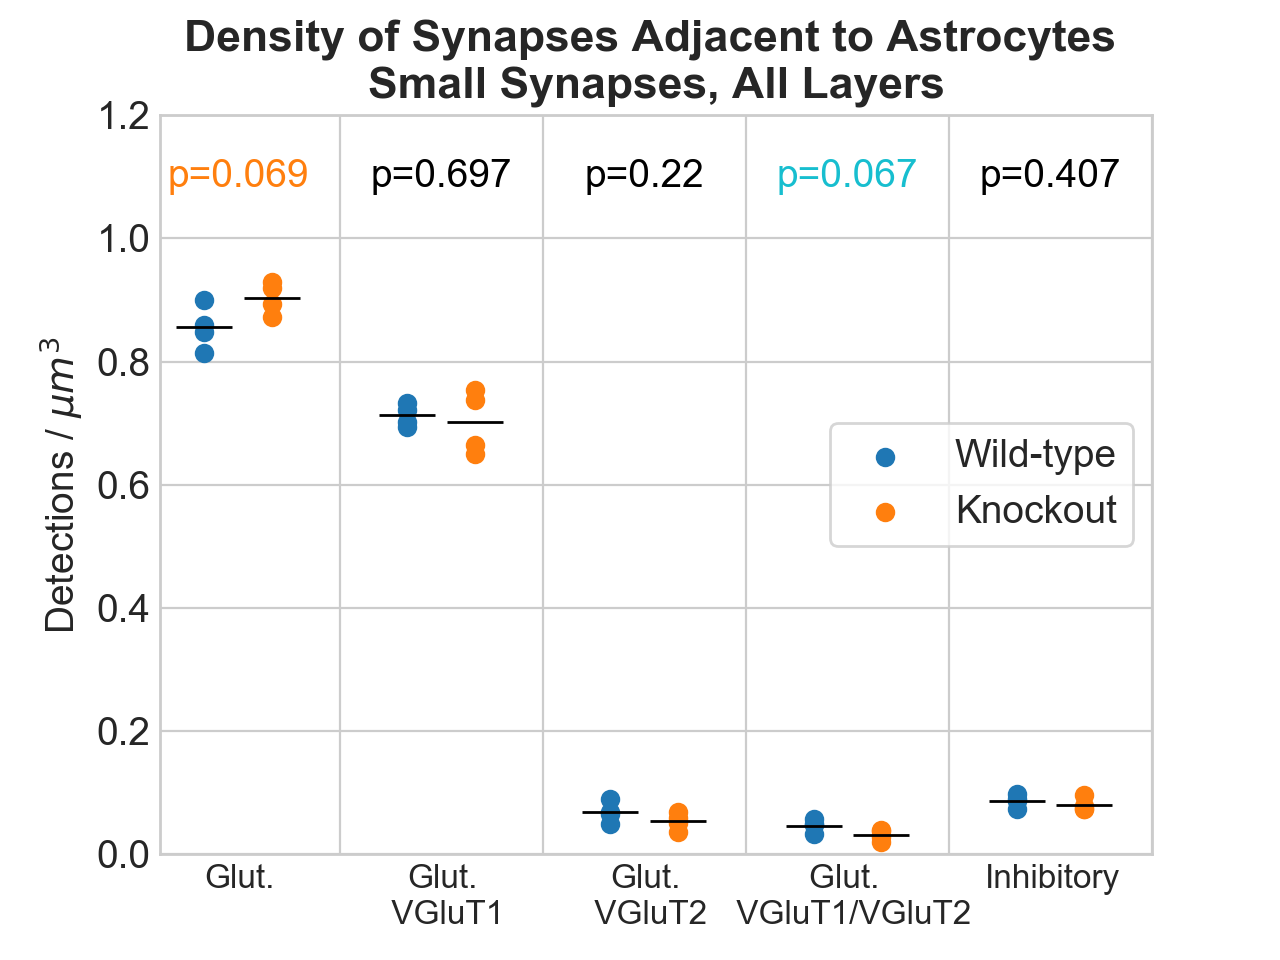

<IPython.core.display.Javascript object>


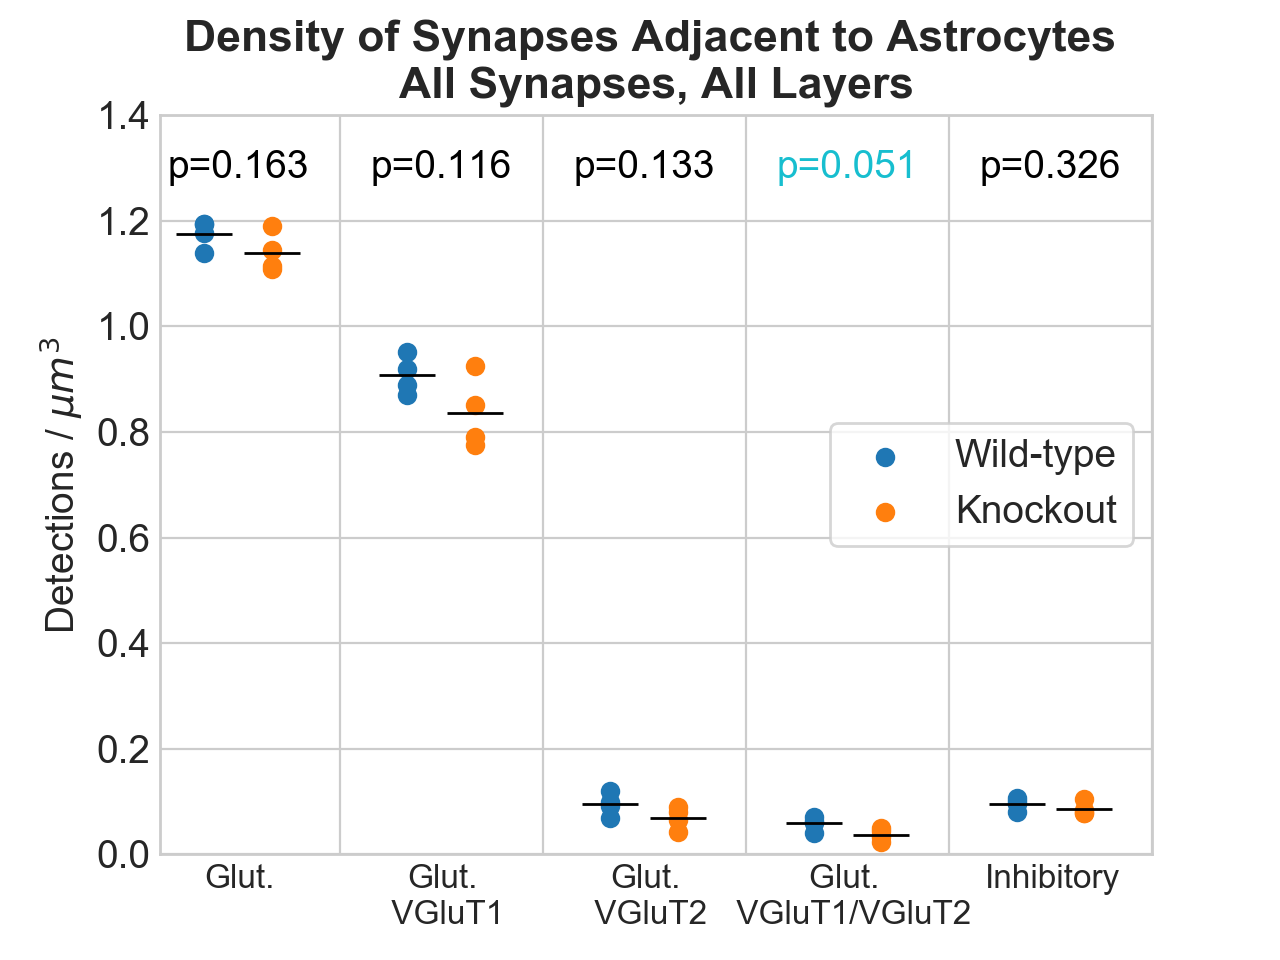

<IPython.core.display.Javascript object>


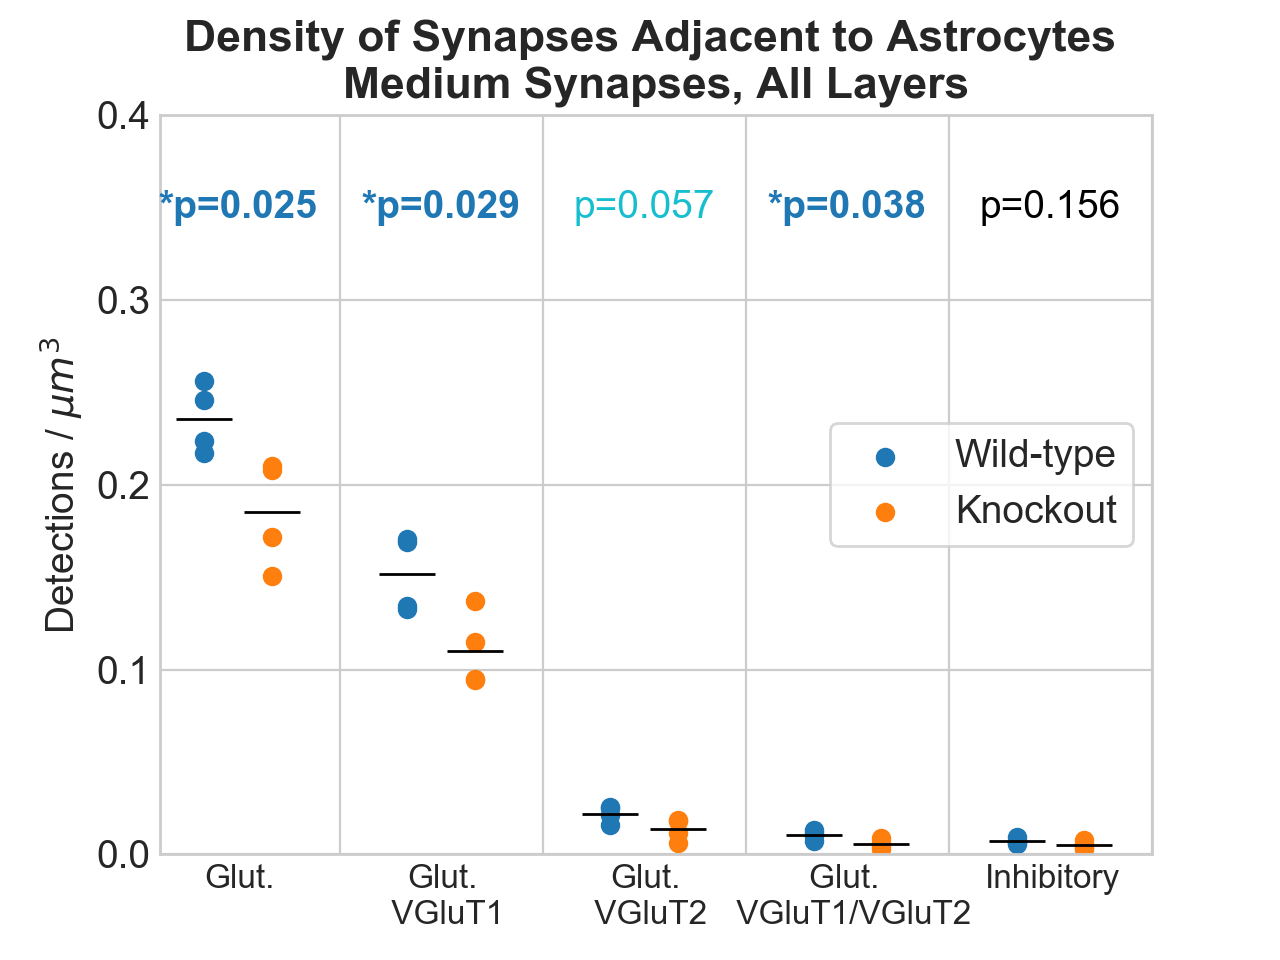

<IPython.core.display.Javascript object>


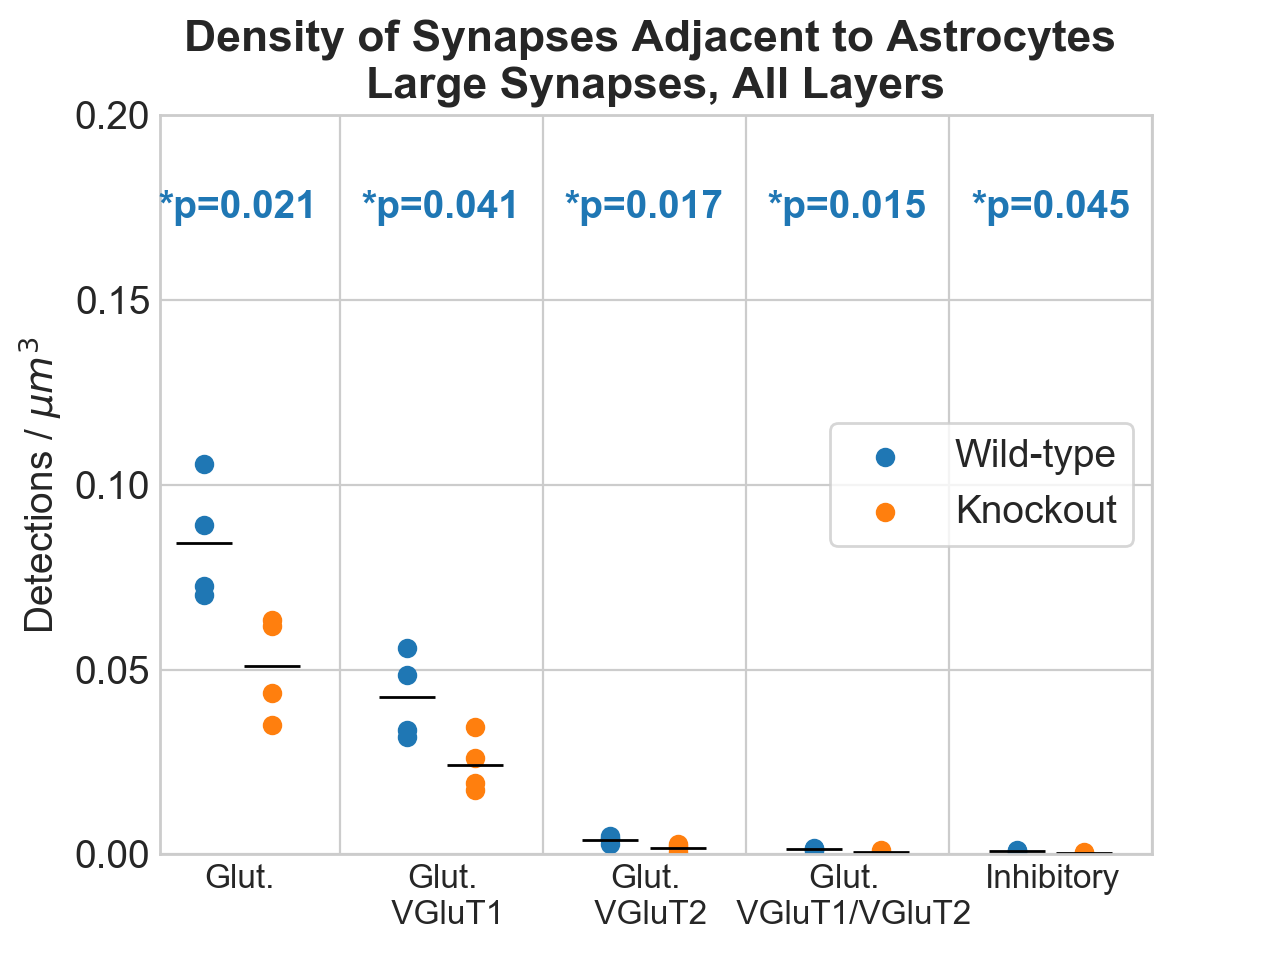

<IPython.core.display.Javascript object>


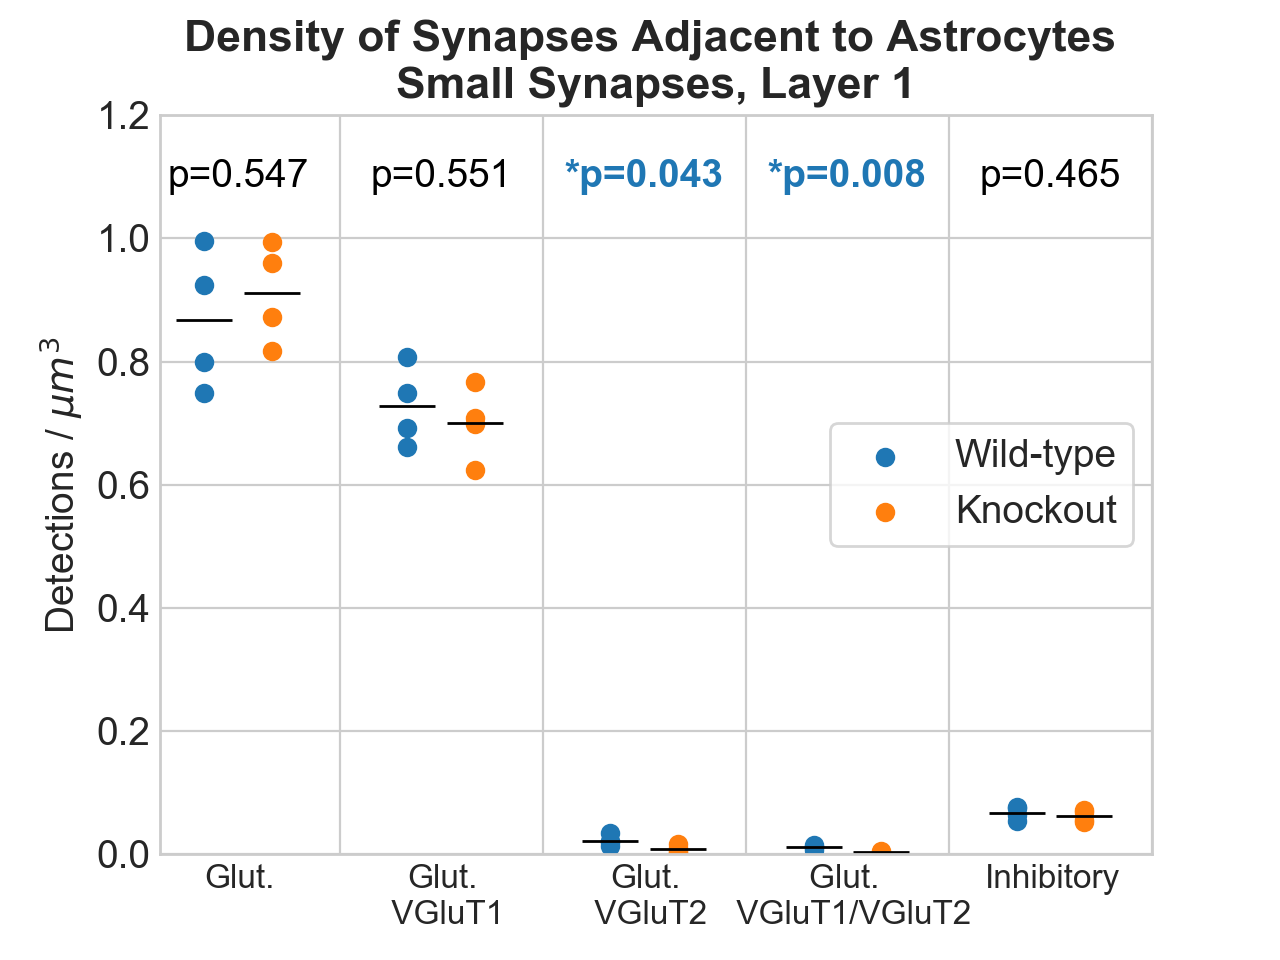

<IPython.core.display.Javascript object>


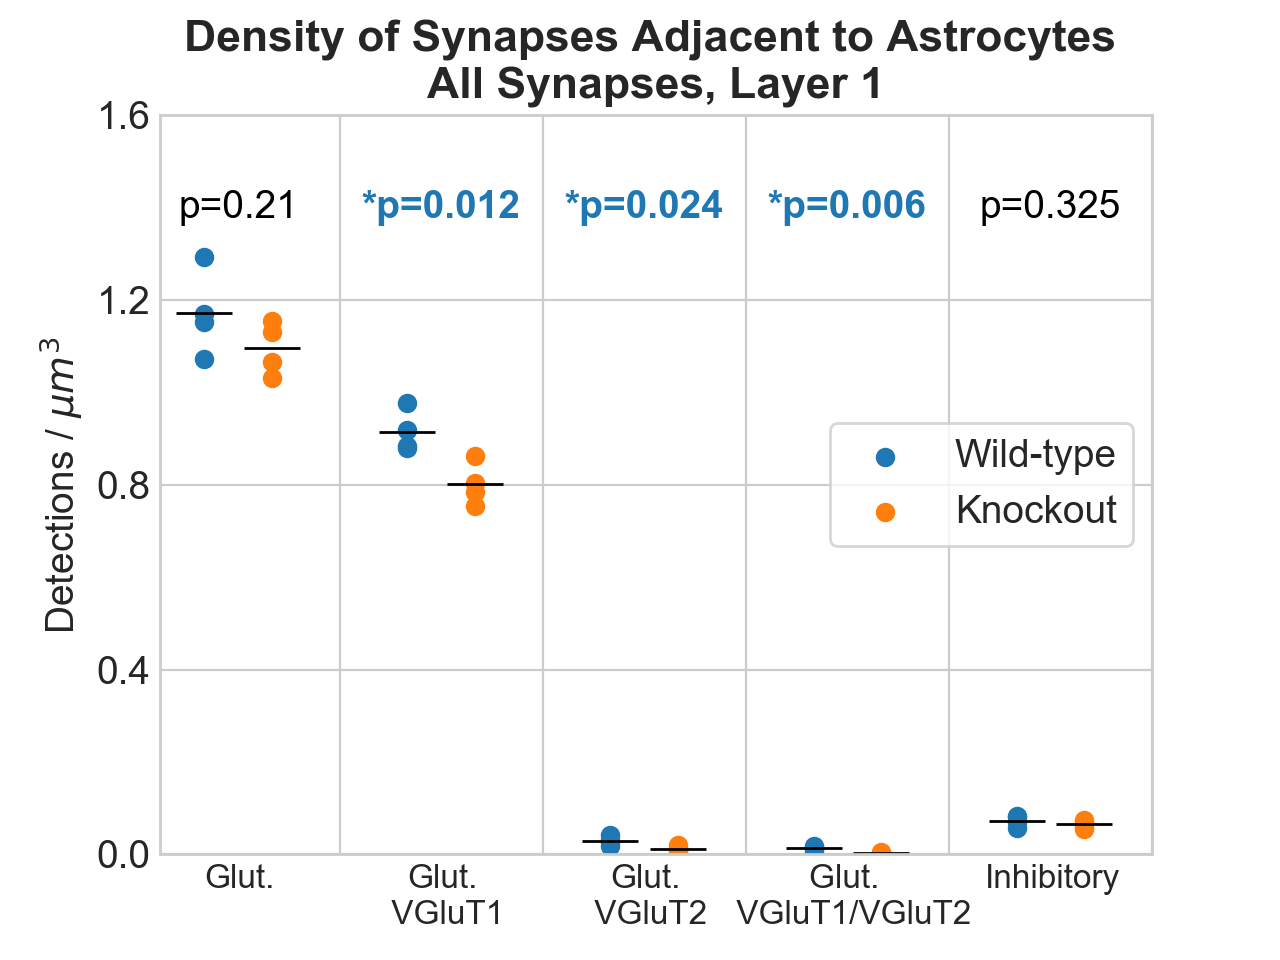

<IPython.core.display.Javascript object>


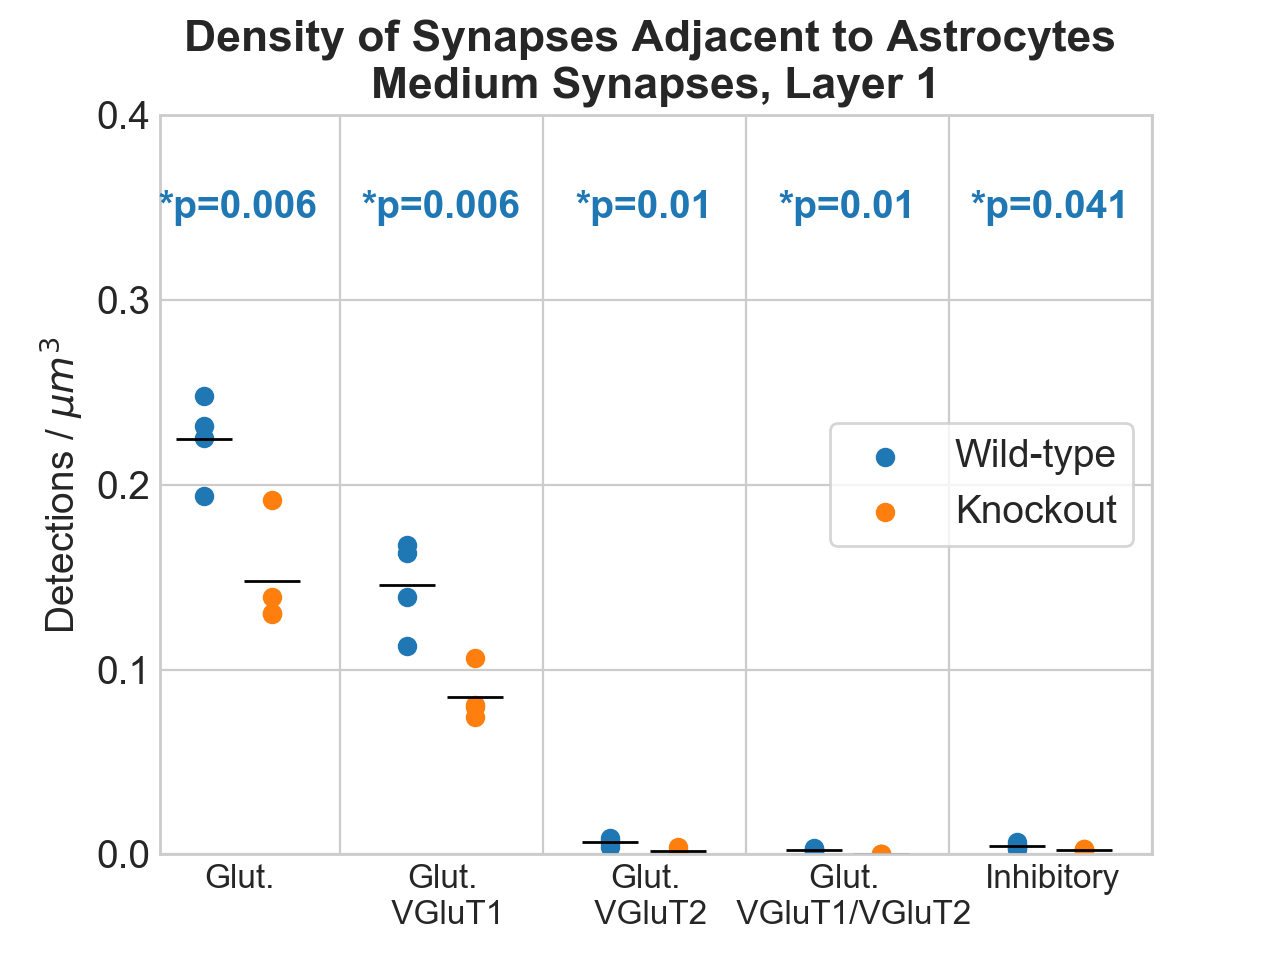

<IPython.core.display.Javascript object>


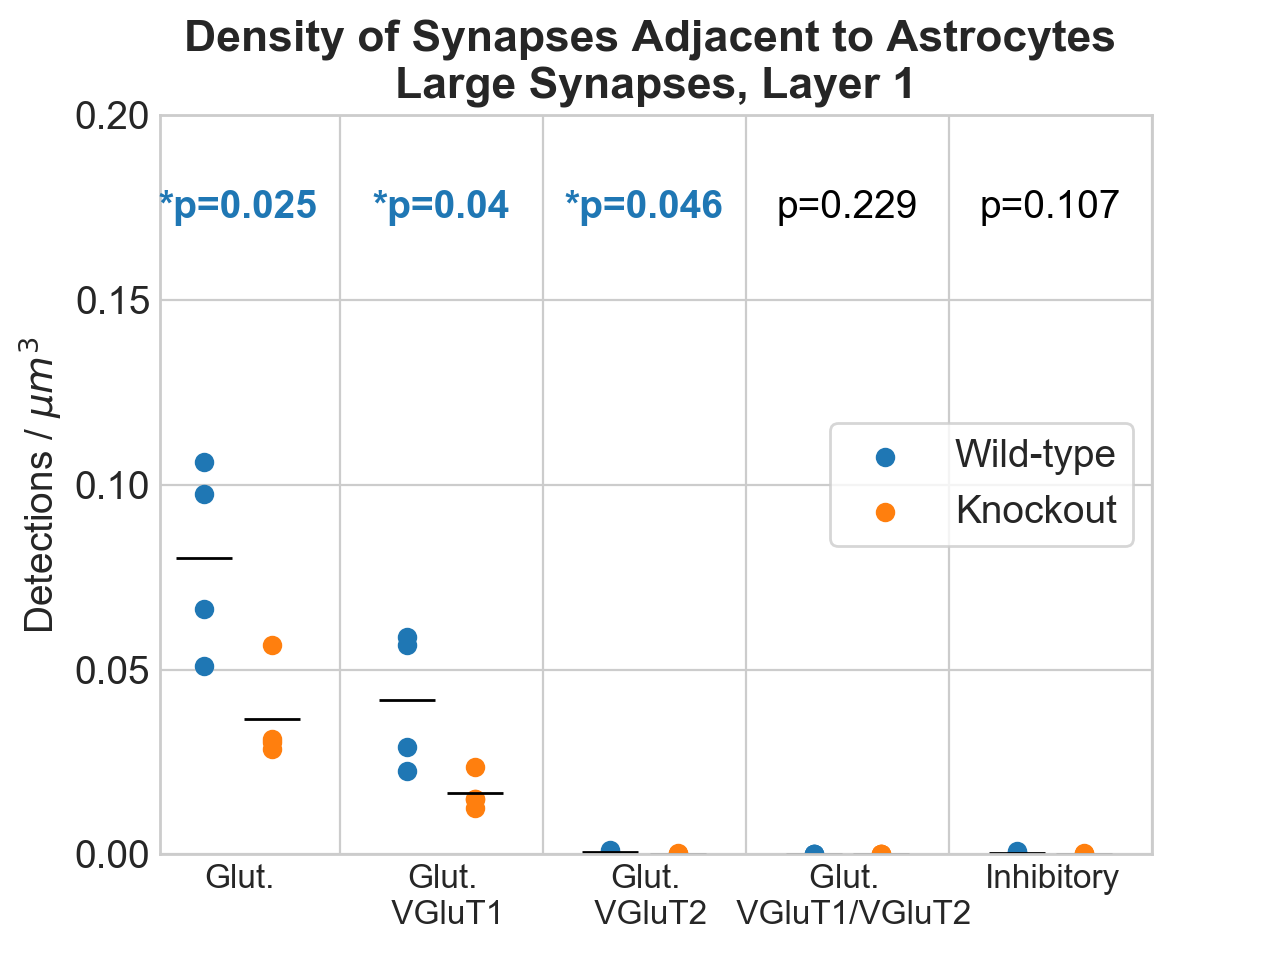

<IPython.core.display.Javascript object>


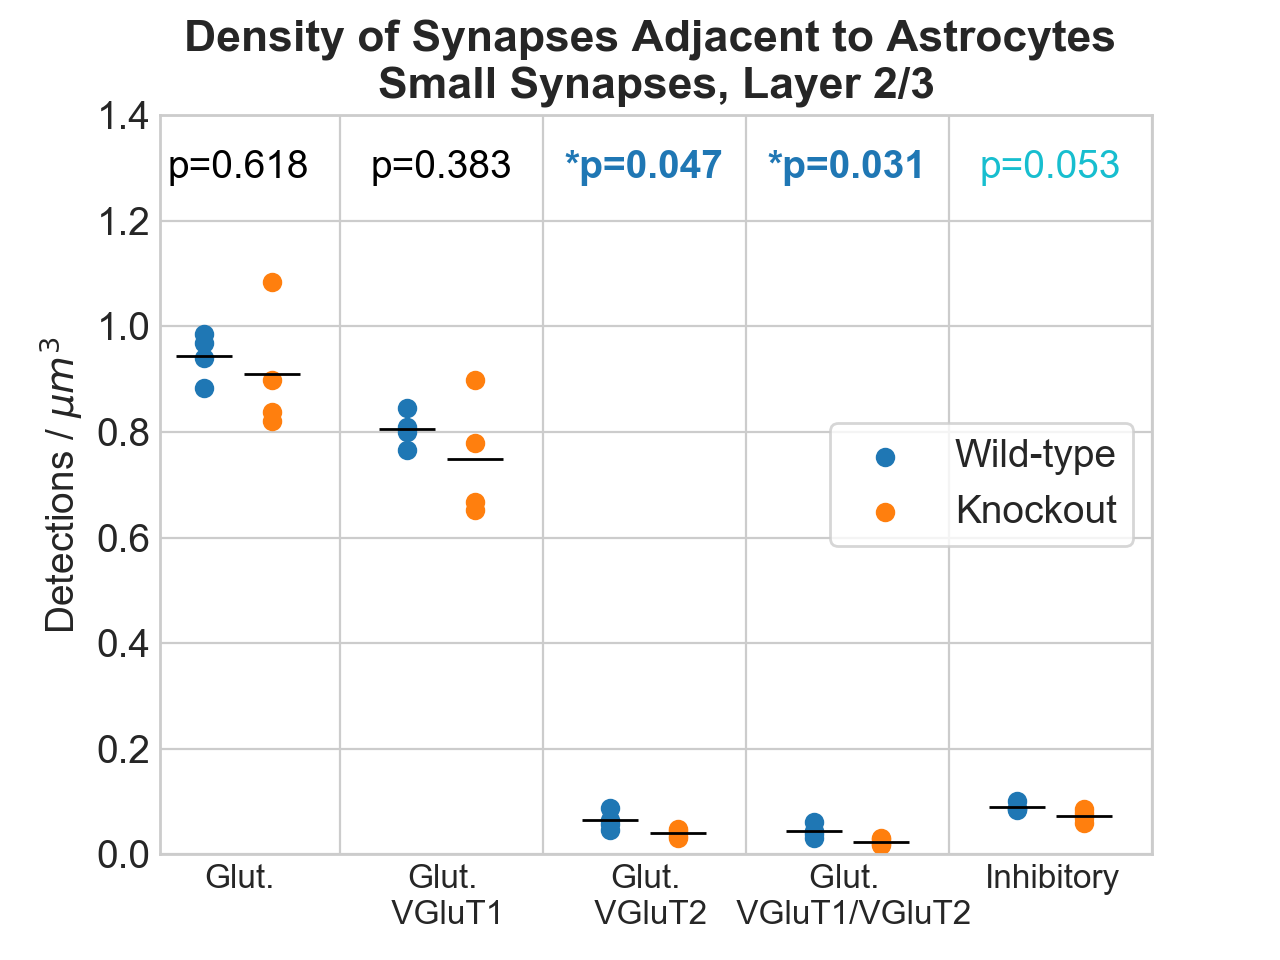

<IPython.core.display.Javascript object>


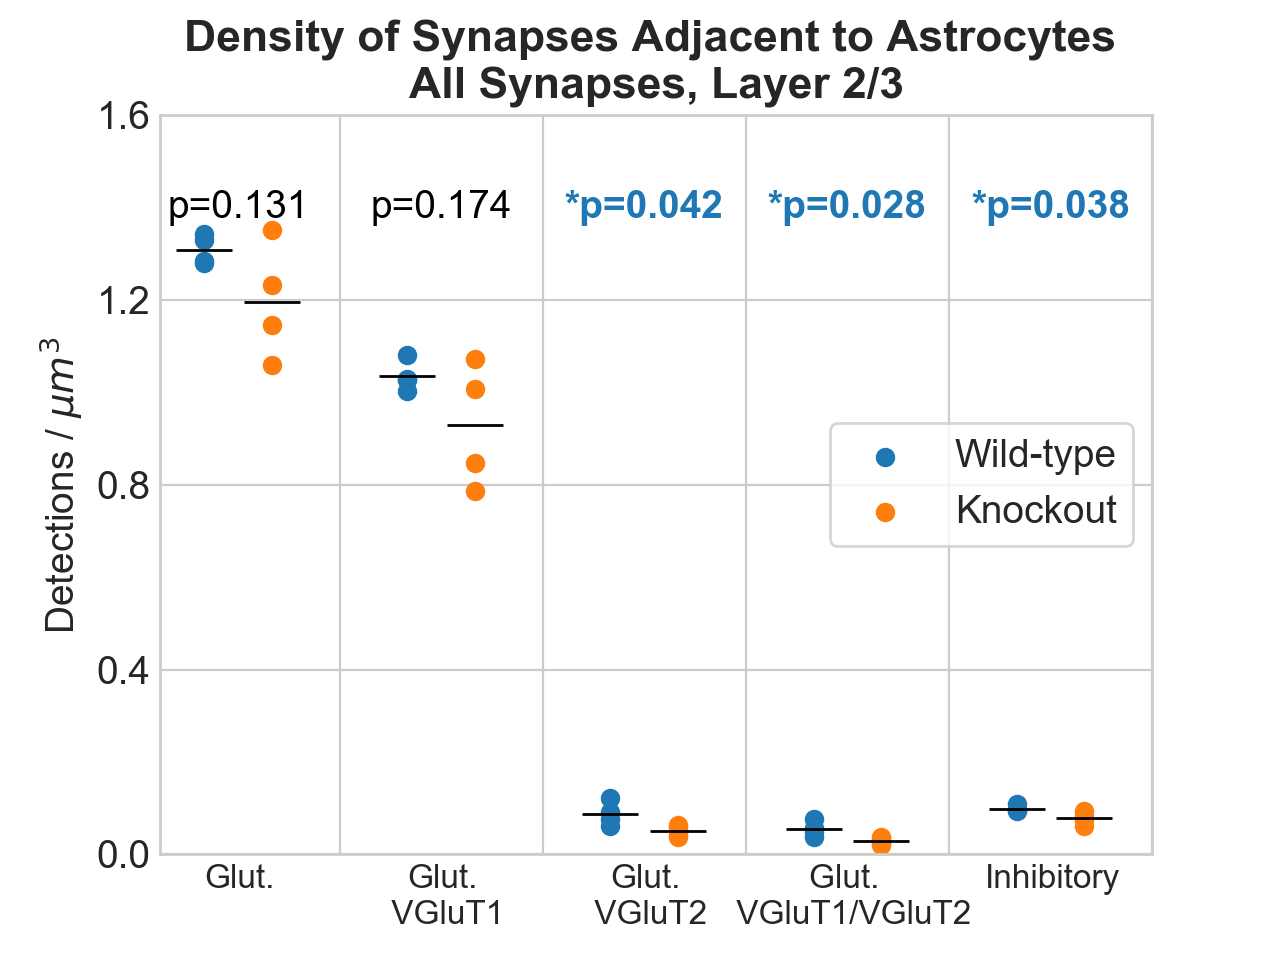

<IPython.core.display.Javascript object>


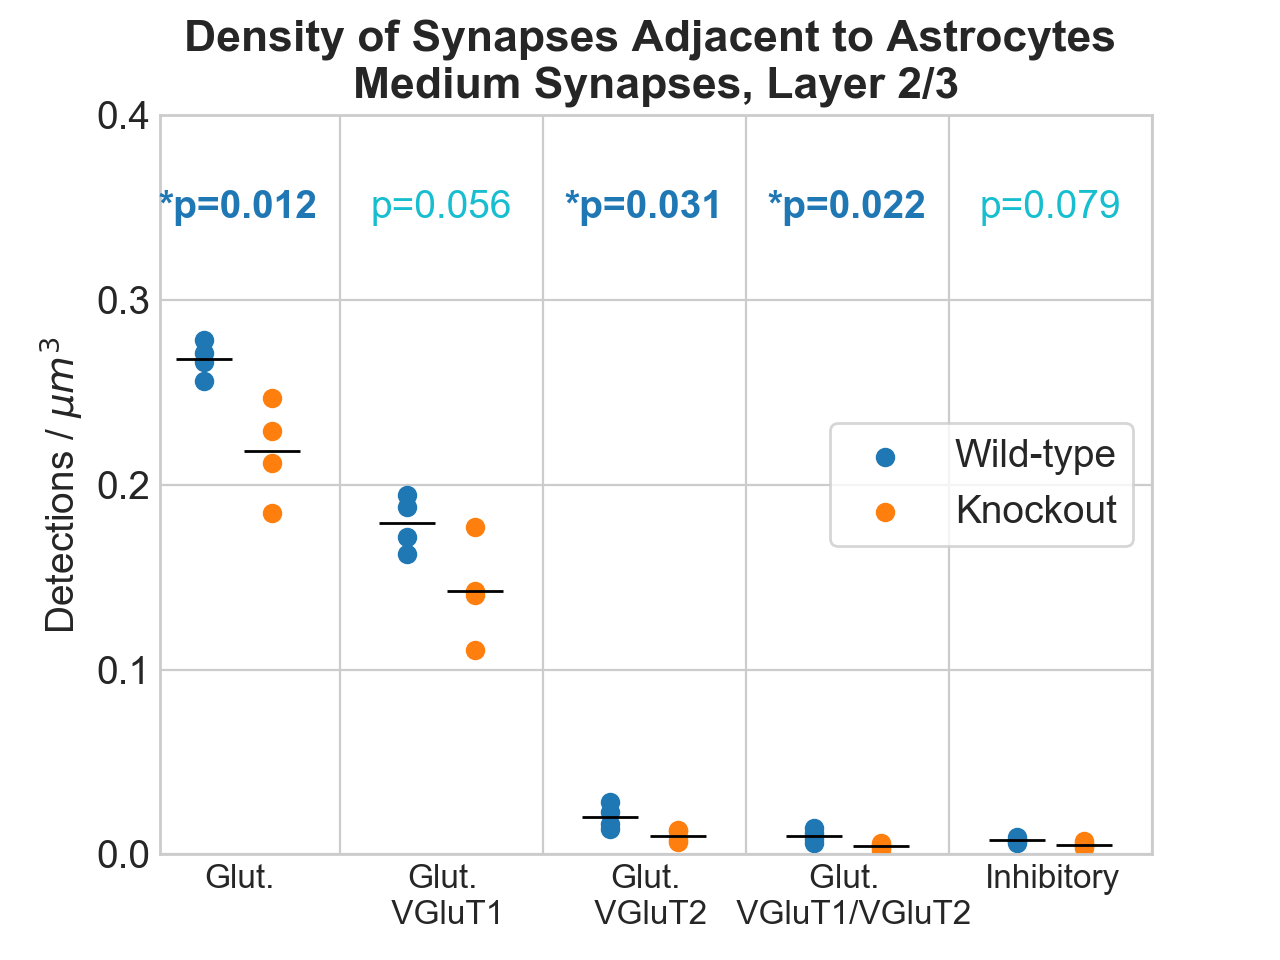

<IPython.core.display.Javascript object>


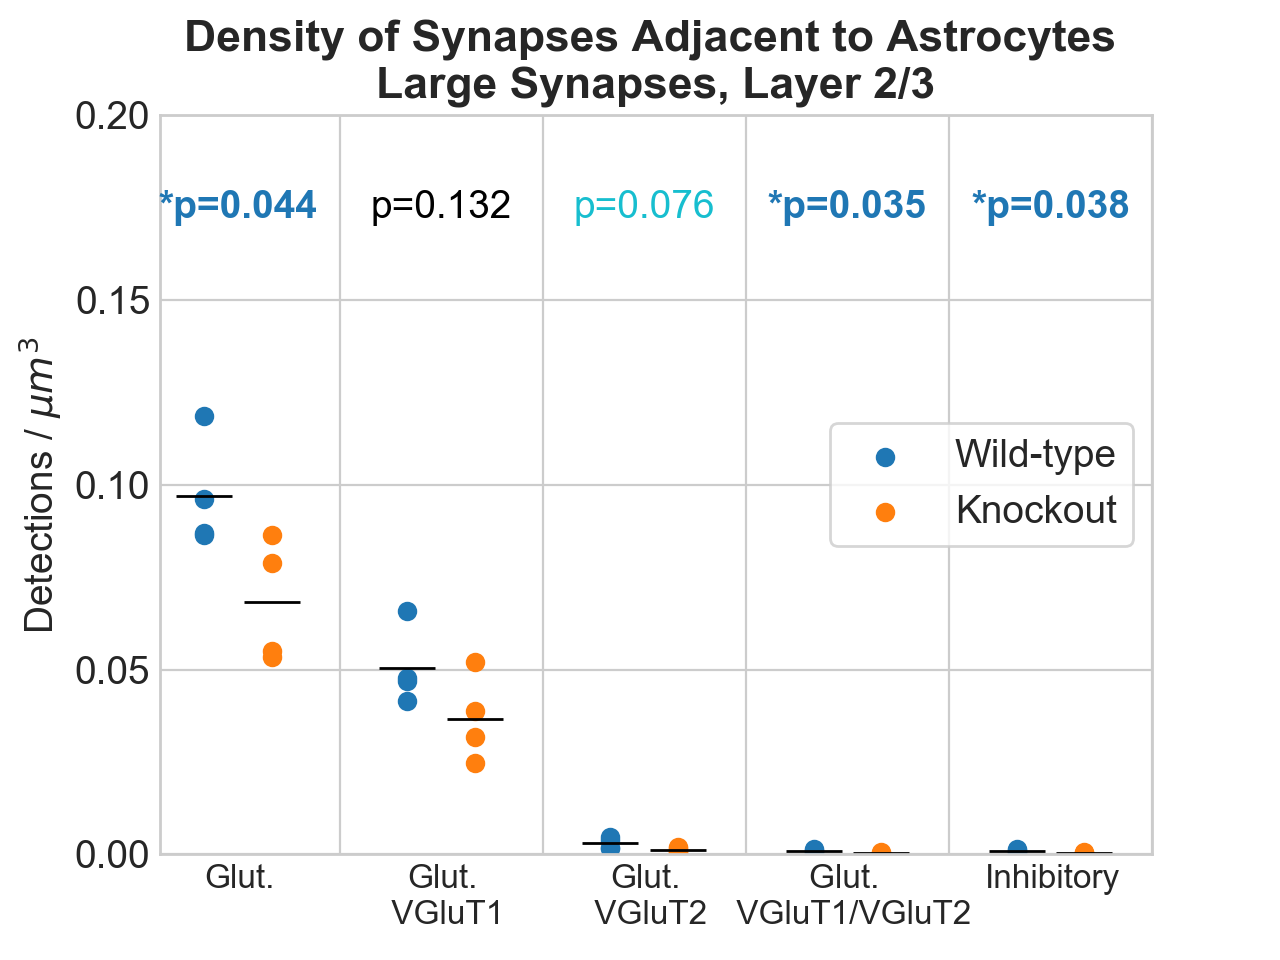

<IPython.core.display.Javascript object>


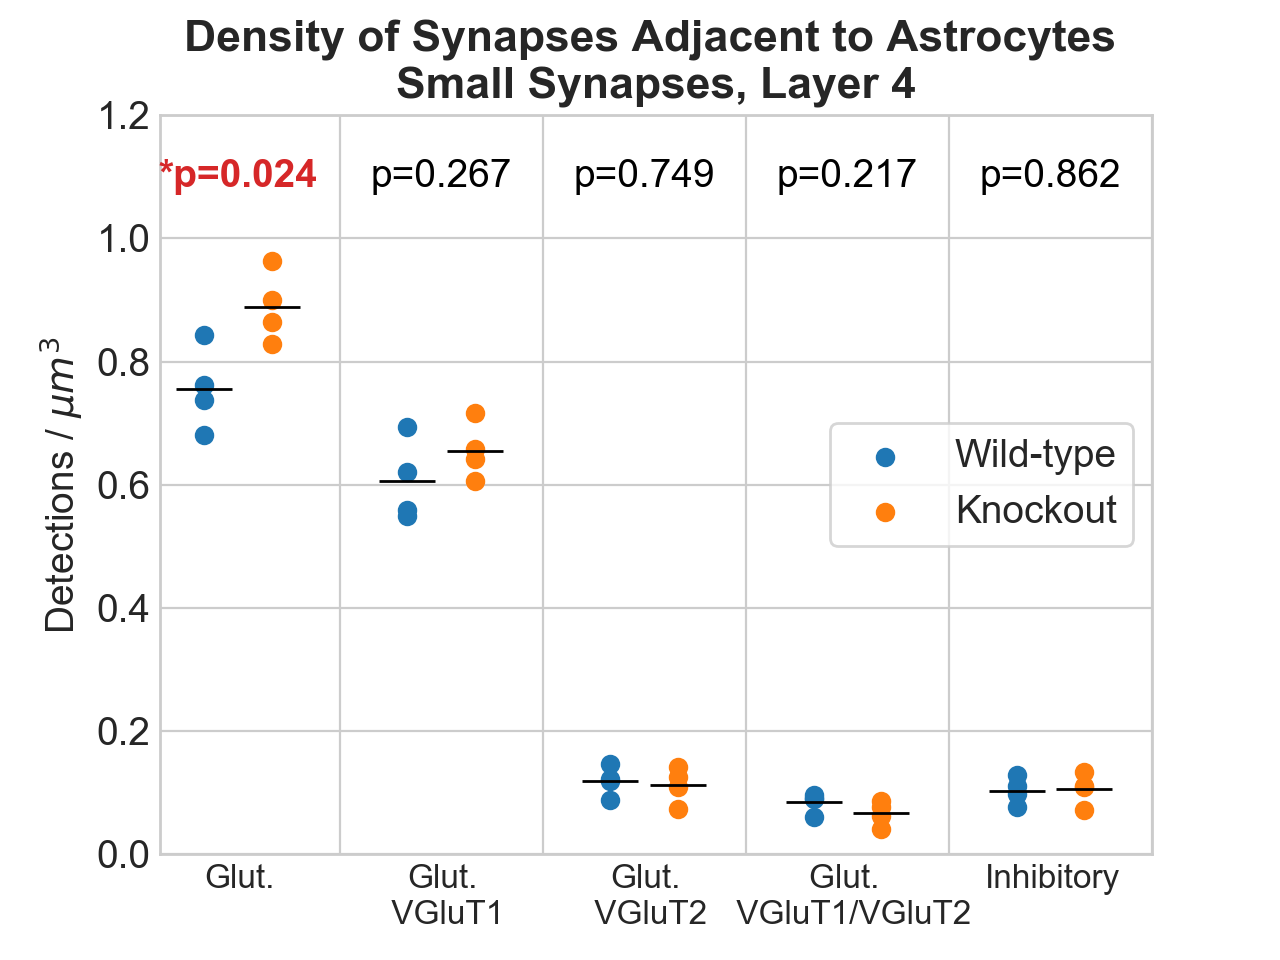

<IPython.core.display.Javascript object>


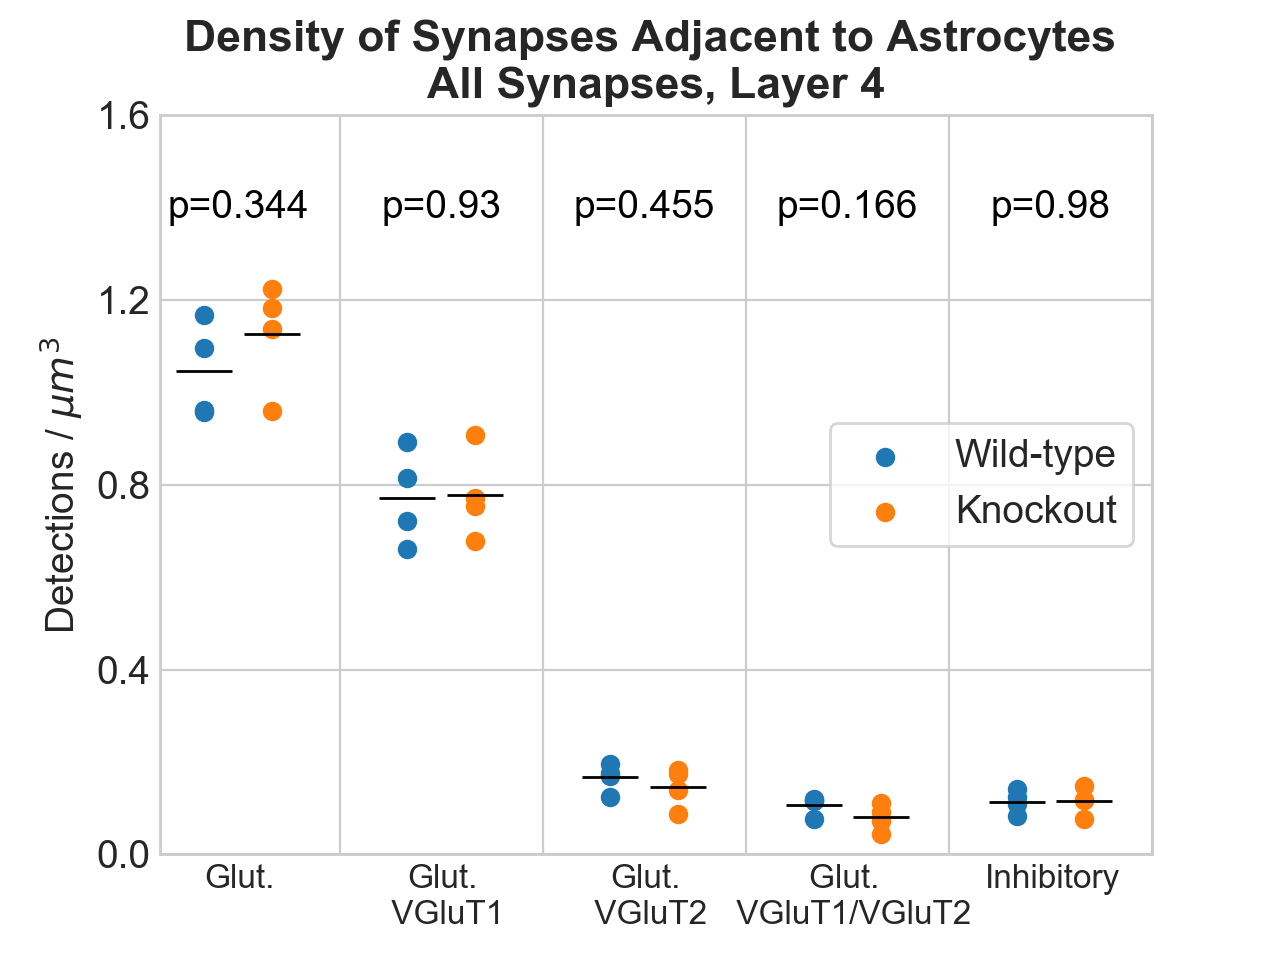

<IPython.core.display.Javascript object>


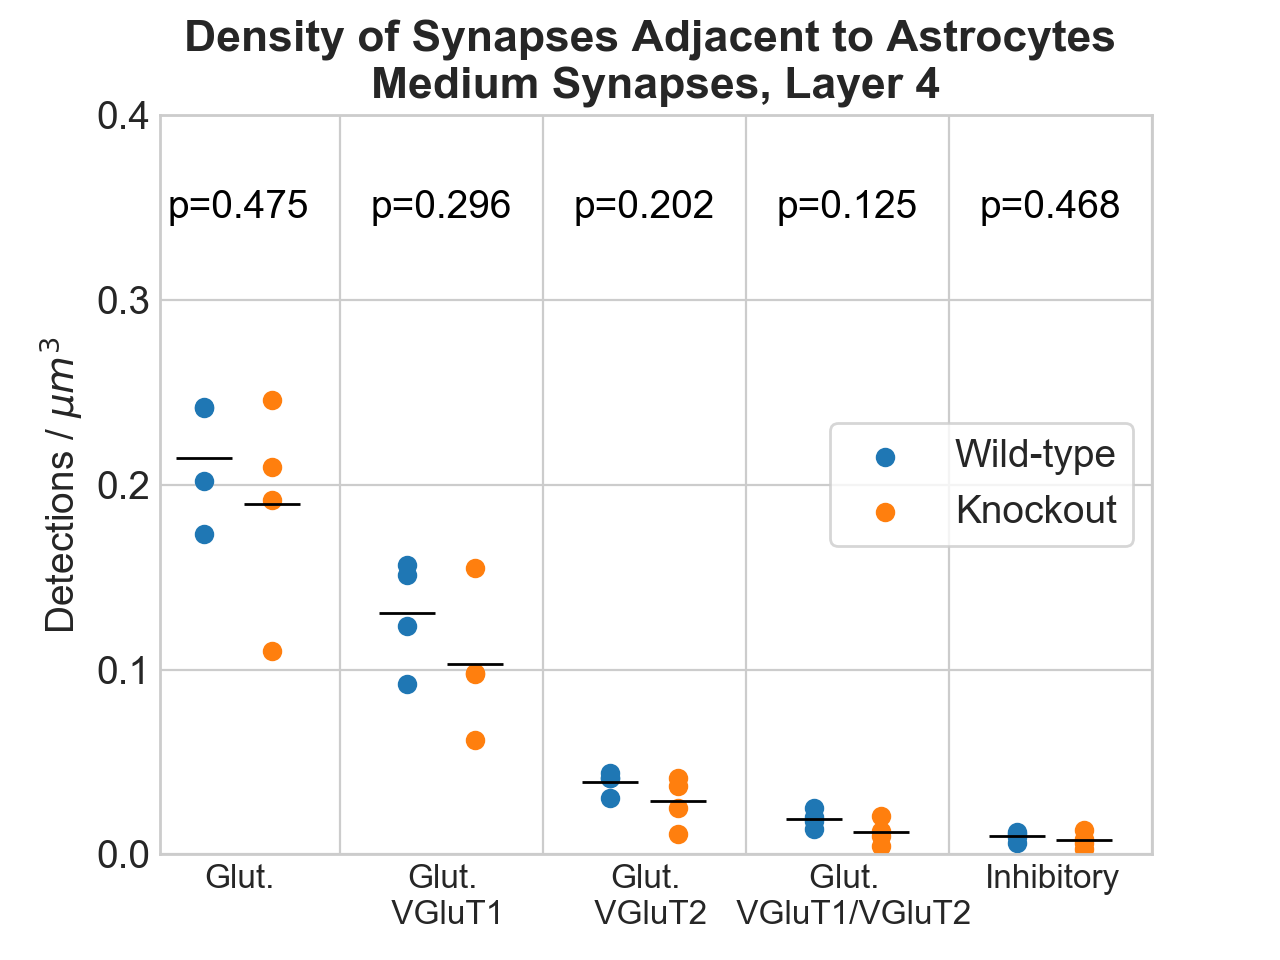

<IPython.core.display.Javascript object>


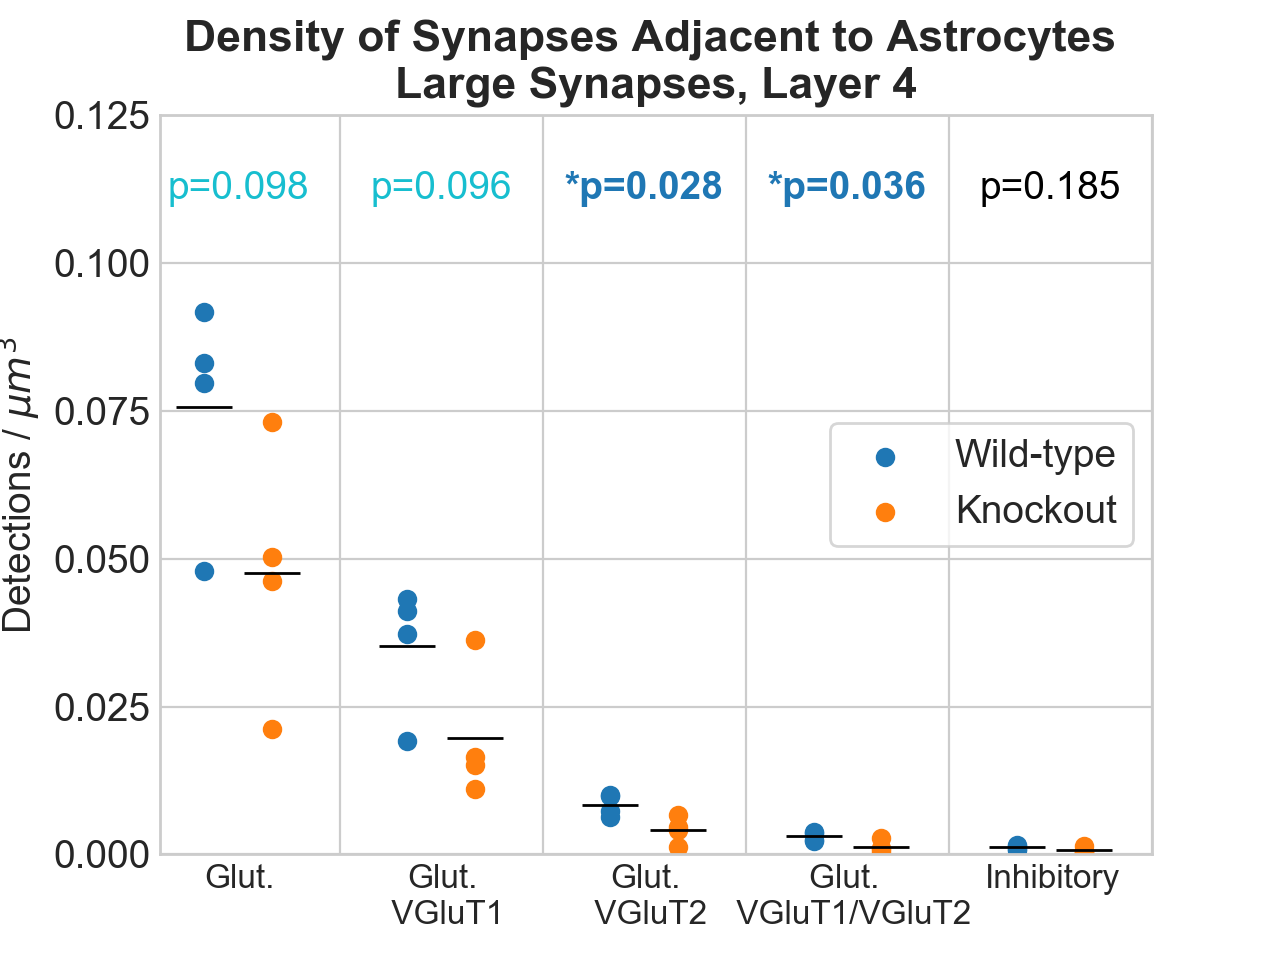

In [21]:
for layer_n, layer_key in enumerate(layer_key_list): 
    for size_n, size_key in enumerate(size_key_list): 
        fig = plt.figure()
        plt.style.use('seaborn-whitegrid')

        x = 0
        x_label_locs = [] 
        layer_error_key = layer_key + '_std_error'
        layer_data_key = layer_key + '_data'
        pval_list = [] 
        pval_x_list = []
        pval_y_list = [] 
        mean_diff_list = [] 
        
        
        for query_key in query_keys: 
            wt_mean = avg_layer_wt_mouse[query_key][layer_key][size_key]
            wt_std_e = avg_layer_wt_mouse[query_key][layer_error_key][size_key]
            p0 = plt.plot(x, wt_mean, markersize=20, marker = "_", color='black', label='wildtype')
            xlist = np.ones((4, 1))*x
            wt_data = avg_layer_wt_mouse[query_key][layer_data_key][size_key]
            p0 = plt.scatter(xlist, wt_data, color='C0', label='wildtype')

            ko_mean = avg_layer_ko_mouse[query_key][layer_key][size_key]
            ko_std_e = avg_layer_ko_mouse[query_key][layer_error_key][size_key]
            plt.plot(x+1, ko_mean, markersize=20, marker = "_", color='black', label='knockout')
            xlist = np.ones((4, 1))*(x+1)
            ko_data = avg_layer_ko_mouse[query_key][layer_data_key][size_key]
            p1 = plt.scatter(xlist, ko_data, color='C1', label='knockout')

            pval = layer_avg_pval_dict[query_key][layer_key][size_key]
            pval_list.append(pval)
            pval_x_list.append(x+0.5)
            pval_y_list.append(max(wt_data))
            pval_y_list.append(max(ko_data))
            mean_diff_list.append(ko_mean - wt_mean)
            x_label_locs.append(x+2)
            x = x + 3

        ax = plt.gca()
        y_data = max(pval_y_list)
        [y, yticks] = fxsdata.get_yticks(y_data)
            
        for p_n, pval in enumerate(pval_list): 
            pval_str = str(round(pval, 3))
            if pval < 0.05: 
                if (mean_diff_list[p_n] > 0): 
                    plt.text(pval_x_list[p_n], y, '*p='+pval_str, color='tab:red', fontsize=14, rotation=0,
                         verticalalignment='center', horizontalalignment='center', fontweight='bold')
                elif (mean_diff_list[p_n] < 0):
                    plt.text(pval_x_list[p_n], y, '*p='+pval_str, color='tab:blue', fontsize=14, rotation=0,
                         verticalalignment='center', horizontalalignment='center', fontweight='bold')

            elif pval < 0.1:
                if (mean_diff_list[p_n] > 0): 
                    plt.text(pval_x_list[p_n], y, 'p='+pval_str, color='tab:orange', fontsize=14, rotation=0,
                         verticalalignment='center', horizontalalignment='center')
                elif (mean_diff_list[p_n] < 0):
                    plt.text(pval_x_list[p_n], y, 'p='+pval_str, color='tab:cyan', fontsize=14, rotation=0,
                         verticalalignment='center', horizontalalignment='center')
            else: 
                plt.text(pval_x_list[p_n], y, 'p='+pval_str, color='black', fontsize=14, rotation=0,
                         verticalalignment='center', horizontalalignment='center')

        plt.title('Density of Synapses Adjacent to Astrocytes \n'+ size_title_list[size_n]+' Synapses, ' + layer_title_list[layer_n], 
                  fontsize=16, fontweight='bold')
        plt.ylabel('Detections / $\mu m^3$', fontsize=14)
        plt.xticks(x_label_locs, xlabels, fontsize=12) 
        plt.legend([p0, p1], ['Wild-type', 'Knockout'], frameon=True, loc='center right', fontsize=14)
        plt.yticks(yticks, fontsize=14)
        plt.ylim([0, yticks[-1]])
        dx = -36/72.; dy = 0/72. 
        offset = matplotlib.transforms.ScaledTranslation(dx, dy, fig.dpi_scale_trans)

        # apply offset transform to all x ticklabels.
        for label in ax.xaxis.get_majorticklabels():
            label.set_transform(label.get_transform() + offset)

        plt.savefig('figs/synapse-astro-figs/astrodensity_' + 
                    layer_fn_list[layer_n] + '_' + size_fn_list[size_n] + '.png',
                    dpi=300, bbox_inches='tight')

        